In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the extended dataset you created earlier.
try:
    df = pd.read_csv('servaydatav2.csv')
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: 'extended_servaydata.csv' not found.")
    print("Please make sure the extended dataset is in the same directory.")

2025-08-21 09:09:23.560009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dataset loaded successfully.


,Which faculty are you currently enrolled in?,Study Groups and Peer Discussions interest ratings,Academic Workshops interest ratings,Are you currently a member of any university club or society?,Tech Meetups & Hackathons interest ratings,Business Idea competition? interest ratings,A workshop on Mental Health & Stress Management? interest ratings,What type of academic content are you most interested in?
0,Faculty of Applied Sciences,4,3,Yes,3,3,4,"Practical & Technical Skills (e.g., coding, la..."
1,Faculty of Applied Sciences,3,3,Yes,3,3,4,"Communication & Leadership (e.g., public speak..."
2,Faculty of Applied Sciences,3,3,Yes,3,3,5,"Data Analysis & Statistics (e.g., SPSS, R, dat..."
3,Faculty of Applied Sciences,4,3,Yes,3,3,3,"Research & Academic Writing (e.g., literature ..."
4,Faculty of Applied Sciences,2,1,No,1,1,3,"Creative & Critical Thinking (e.g., problem-so..."


In [12]:
# Clean up column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

# Separate the input features (user profile) from the target variables (ratings)
# We add .copy() here to prevent the SettingWithCopyWarning in the next cell
user_profile_df = df[['Which faculty are you currently enrolled in?',
                      'Are you currently a member of any university club or society?',
                      'What type of academic content are you most interested in?']].copy()

ratings_df = df[['Study Groups and Peer Discussions interest ratings',
                 'Academic Workshops  interest ratings',
                 'Tech Meetups & Hackathons  interest ratings',
                 'Business Idea competition?   interest ratings',
                 'A workshop on Mental Health & Stress Management?  interest ratings']]

print("User Profile Features:")
display(user_profile_df.head())
print("\nTarget Ratings:")
display(ratings_df.head())

User Profile Features:


,Which faculty are you currently enrolled in?,Are you currently a member of any university club or society?,What type of academic content are you most interested in?
0,Faculty of Applied Sciences,Yes,"Practical & Technical Skills (e.g., coding, la..."
1,Faculty of Applied Sciences,Yes,"Communication & Leadership (e.g., public speak..."
2,Faculty of Applied Sciences,Yes,"Data Analysis & Statistics (e.g., SPSS, R, dat..."
3,Faculty of Applied Sciences,Yes,"Research & Academic Writing (e.g., literature ..."
4,Faculty of Applied Sciences,No,"Creative & Critical Thinking (e.g., problem-so..."



Target Ratings:


,Study Groups and Peer Discussions interest ratings,Academic Workshops interest ratings,Tech Meetups & Hackathons interest ratings,Business Idea competition? interest ratings,A workshop on Mental Health & Stress Management? interest ratings
0,4,3,3,3,4
1,3,3,3,3,4
2,3,3,3,3,5
3,4,3,3,3,3
4,2,1,1,1,3


In [13]:
# a) Encode Categorical Features (One-Hot Encoding)
faculty_encoded = pd.get_dummies(user_profile_df['Which faculty are you currently enrolled in?'], prefix='faculty', dtype=int)
club_encoded = pd.get_dummies(user_profile_df['Are you currently a member of any university club or society?'], prefix='club', dtype=int)

# b) Encode Multi-Label Feature ('academic content')
# The content interests are comma-separated strings. We need to split them.
user_profile_df['What type of academic content are you most interested in?'] = user_profile_df['What type of academic content are you most interested in?'].apply(lambda x: [i.strip() for i in x.split(',')])

mlb = MultiLabelBinarizer()
content_encoded = pd.DataFrame(mlb.fit_transform(user_profile_df['What type of academic content are you most interested in?']),
                               columns=mlb.classes_,
                               index=user_profile_df.index)

print("Shape of faculty_encoded:", faculty_encoded.shape)
print("Shape of club_encoded:", club_encoded.shape)
print("Shape of content_encoded:", content_encoded.shape)


Shape of faculty_encoded: (322, 6)
Shape of club_encoded: (322, 2)
Shape of content_encoded: (322, 22)


In [14]:
# c) Combine all processed features into a single input DataFrame `X`
X = pd.concat([faculty_encoded, club_encoded, content_encoded], axis=1)

# d) Normalize the output ratings to be between 0 and 1
scaler = MinMaxScaler()
y = pd.DataFrame(scaler.fit_transform(ratings_df), columns=ratings_df.columns)

print("Final Input DataFrame (X):")
display(X.head())
print("\nFinal Normalized Output DataFrame (y):")
display(y.head())

Final Input DataFrame (X):


,faculty_Faculty of Agriculture,faculty_Faculty of Applied Sciences,faculty_Faculty of Management Studies,faculty_Faculty of Medicine and Allied Sciences,faculty_Faculty of Social Sciences and Humanities,faculty_Faculty of Technology,club_No,club_Yes,Business & Management (e.g.,Communication & Leadership (e.g.,...,finance,lab experiments,literature reviews,marketing,negotiation),paper writing),problem-solving,project management),public speaking,teamwork
0,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,1,1
1,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,1
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,1,1,0,0,1,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0



Final Normalized Output DataFrame (y):


,Study Groups and Peer Discussions interest ratings,Academic Workshops interest ratings,Tech Meetups & Hackathons interest ratings,Business Idea competition? interest ratings,A workshop on Mental Health & Stress Management? interest ratings
0,0.75,0.5,0.5,0.5,0.75
1,0.50,0.5,0.5,0.5,0.75
2,0.50,0.5,0.5,0.5,1.00
3,0.75,0.5,0.5,0.5,0.50
4,0.25,0.0,0.0,0.0,0.50


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Input feature shape: {X.shape}")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Input feature shape: (322, 30)
Training data shape: (257, 30)
Testing data shape: (65, 30)


In [16]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 14,469
Trainable params: 14,469
Non-trai

In [18]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/50
17/17 [==============================] - 1s 24ms/step - loss: 0.1238 - mae: 0.2992 - val_loss: 0.1034 - val_mae: 0.2655
Epoch 2/50
17/17 [==============================] - 0s 8ms/step - loss: 0.1124 - mae: 0.2838 - val_loss: 0.1020 - val_mae: 0.2641
Epoch 3/50
17/17 [==============================] - 0s 13ms/step - loss: 0.1116 - mae: 0.2834 - val_loss: 0.1011 - val_mae: 0.2631
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 0.1104 - mae: 0.2805 - val_loss: 0.1000 - val_mae: 0.2619
Epoch 5/50
17/17 [==============================] - 0s 7ms/step - loss: 0.1098 - mae: 0.2805 - val_loss: 0.0991 - val_mae: 0.2608
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 0.1074 - mae: 0.2788 - val_loss: 0.0981 - val_mae: 0.2598
Epoch 7/50
17/17 [==============================] - 0s 11ms/step - loss: 0.1053 - mae: 0.2735 - val_loss: 0.0969 - val_mae: 0.2582
Epoch 8/50
17/17 [==============================] - 0s 8ms/step - loss: 0.1058 - mae: 0

In [20]:
# Create a sample profile for a new student
new_student_profile = {
    'Which faculty are you currently enrolled in?': 'Faculty of Technology',
    'Are you currently a member of any university club or society?': 'Yes',
    'What type of academic content are you most interested in?': 'Creative & Critical Thinking (e.g., problem-solving, design thinking), Practical & Technical Skills (e.g., coding, lab experiments, clinical skills)'
}

# --- Preprocess the new student's data ---
new_student_df = pd.DataFrame([new_student_profile])
new_faculty_encoded = pd.get_dummies(new_student_df['Which faculty are you currently enrolled in?'], prefix='faculty', dtype=int).reindex(columns=faculty_encoded.columns, fill_value=0)
new_club_encoded = pd.get_dummies(new_student_df['Are you currently a member of any university club or society?'], prefix='club', dtype=int).reindex(columns=club_encoded.columns, fill_value=0)
new_student_df['What type of academic content are you most interested in?'] = new_student_df['What type of academic content are you most interested in?'].apply(lambda x: [i.strip() for i in x.split(',')])
new_content_encoded = pd.DataFrame(mlb.transform(new_student_df['What type of academic content are you most interested in?']), columns=mlb.classes_).reindex(columns=content_encoded.columns, fill_value=0)
new_student_X = pd.concat([new_faculty_encoded, new_club_encoded, new_content_encoded], axis=1)
new_student_X = new_student_X[X_train.columns] # Ensure column order is the same

# --- Generate and Display Recommendations ---
# Convert the input to a float32 NumPy array before prediction
predicted_ratings_scaled = model.predict(new_student_X.astype(np.float32))
predicted_ratings = scaler.inverse_transform(predicted_ratings_scaled)
recommendations = pd.DataFrame(predicted_ratings, columns=ratings_df.columns)

print("\n--- Recommendations for the New Student ---")
print("\nPredicted Interest Ratings (1-5 scale):")
print(recommendations.T.sort_values(by=0, ascending=False).rename(columns={0: 'Predicted Rating'}))



1/1 [==============================] - 0s 113ms/step

--- Recommendations for the New Student ---

Predicted Interest Ratings (1-5 scale):
                                                    Predicted Rating
Tech Meetups & Hackathons  interest ratings                 3.413667
Academic Workshops  interest ratings                        3.231492
A workshop on Mental Health & Stress Management...          2.990291
Study Groups and Peer Discussions interest ratings          2.564359
Business Idea competition?   interest ratings               2.374254


In [21]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"\n--- Final Model Evaluation on Test Data ---")
print(f"Test Loss (Mean Squared Error): {test_loss:.4f}")
print(f"Test Mean Absolute Error: {test_mae:.4f}")


--- Final Model Evaluation on Test Data ---
Test Loss (Mean Squared Error): 0.0907
Test Mean Absolute Error: 0.2403


Matplotlib is building the font cache; this may take a moment.


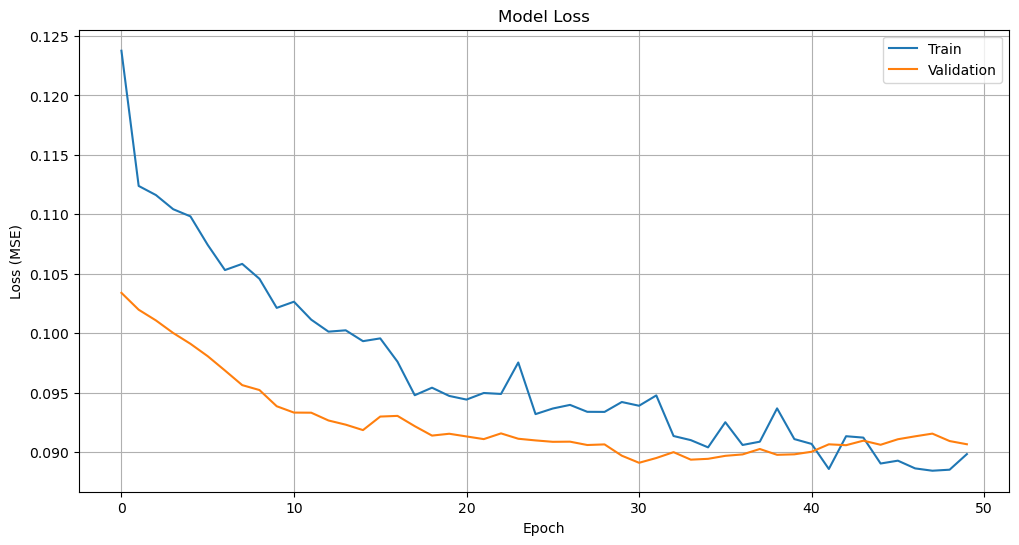

In [23]:
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

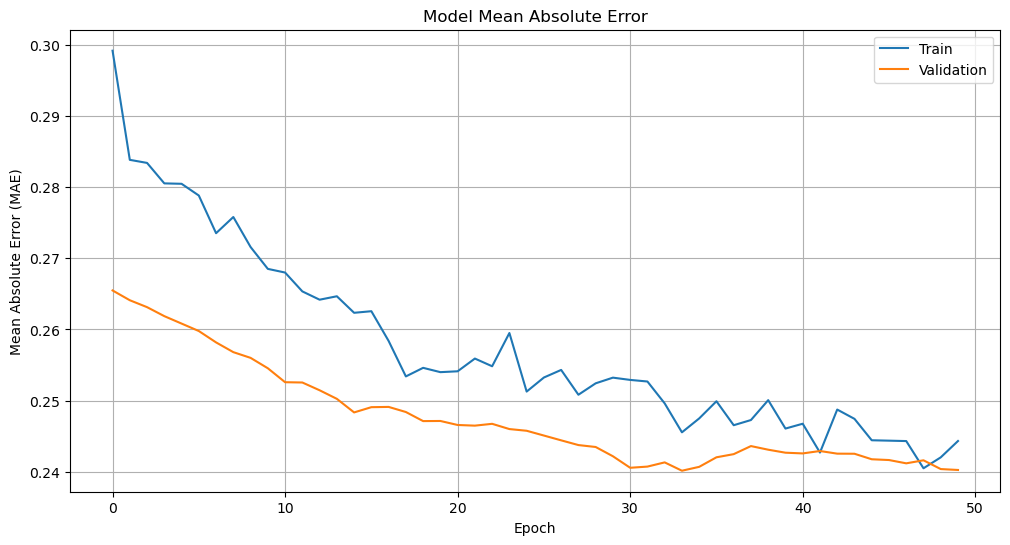

In [24]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()